In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.optimizers import Adam
import cv2
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image

The base colors(impure) which the shop contains

In [ ]:
shop_red = np.array([245,10,20])
shop_green= np.array([10,245,20])
shop_blue = np.array([12,23,245])
base_colors = np.array([shop_red, shop_green, shop_blue])

creating random masses between 0 to 1 for data

In [ ]:
np.random.seed(253)
num_samples = 10000
num_samples_10_percent = int(num_samples * 0.1)

masses_low_range = np.random.uniform(0, 0.2, size=(num_samples_10_percent, 3))
masses_high_range = np.random.uniform(0.92, 1, size=(num_samples_10_percent, 3))

remaining_samples = num_samples - 2 * num_samples_10_percent
masses_random = np.random.uniform(0, 1, size=(remaining_samples, 3))

masses = np.vstack((masses_low_range, masses_high_range, masses_random))
np.random.shuffle(masses)

calculating the result colors baased on the masses , hence creating the data required for training the machine

In [ ]:
def compute_color(masses, base_colors):
    return np.dot(masses,base_colors)

result_colors = np.array([compute_color(mass, base_colors) for mass in masses])



creating a neural network and training it

In [ ]:
#sequential model for neural network
model = keras.Sequential([
    #using leakyrelu activation and 256 neurons for each layers , having 5 layers
    keras.layers.Dense(256, input_dim=3),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    keras.layers.Dense(256,),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    keras.layers.Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    keras.layers.Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.1),
    keras.layers.Dense(3, activation='relu')
])
#for getting the best of the model , stop the training when we achieve the bes tepoch with least loss
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                 patience=10,
                                 restore_best_weights=True)
#reducing the learning rate if then next epoch is less efficient than the present
reduce_learning=tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                     factor=0.2,
                                     verbose=0,
                                     patience=5,
                                     min_lr=0.00001,
)
#saving the best epoch
callback = keras.callbacks.ModelCheckpoint(
    'HI.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
    )

model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

result_colors_norm = result_colors / 255.0
#running the model
run = model.fit(result_colors_norm, masses, epochs=100, validation_split=0.2,callbacks=[early_stopping, reduce_learning, callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5639 - loss: 0.1805 - val_accuracy: 0.5275 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6629 - loss: 0.0352 - val_accuracy: 0.7885 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6899 - loss: 0.0254 - val_accuracy: 0.7870 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7046 - loss: 0.0204 - val_accuracy: 0.8450 - val_loss: 0.0087 - learning_rate: 0.0010
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7261 - loss: 0.0182 - val_accuracy: 0.8660 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7288 - loss: 0.0153 - val_accuracy: 0.8490 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7394 - loss: 

target_rgb_norm is a random color which we want to attain with the impure colors the shop has. Predicting the masses for the color required. Also calculating the color which we will obtain with the help of the masses.If both are close , we've achieved our target.

Saving hi.png to hi.png
R=108 , G=68, B=154


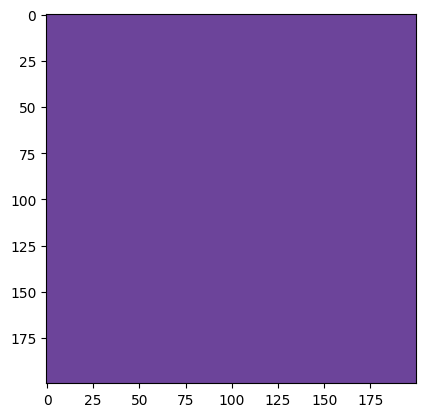

In [ ]:
fileupload=files.upload()
theimage=list(fileupload)[0]
imageread = cv2.imread(theimage)
imagewithrgb=cv2.cvtColor(imageread,cv2.COLOR_BGR2RGB)
r, g, b =imagewithrgb[0,0]
print(f"R={r} , G={g}, B={b}")
plt.imshow(imagewithrgb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
0.4052027 0.2193029 0.58159566
Percentage of each base_color: 
 33.59607756137848 18.182793259620667 48.22113215923309

Predicted Color: (108.44683510065079, 71.15793573856354, 154.98104810714722)

Target color: [108.  68. 154.]


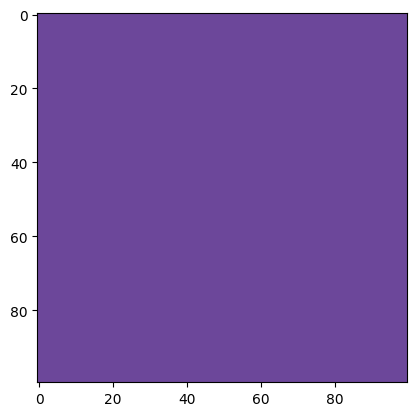

In [ ]:
target_rgb_norm = np.array([r, g, b]) / 255

predicted_masses = model.predict(np.array([target_rgb_norm]))[0]
[m1 ,m2 ,m3]=predicted_masses

print(m1,m2,m3)
sum=m1+m2+m3
def percentage(m, total):
    if isinstance(m, (int, float, np.float32, np.float64)):
        p = min(max(0, (m / total) * 100), 100)
    else:
        raise ValueError("Input must be a single numeric value")
    return p

print("Percentage of each base_color: \n",percentage(m1,sum),percentage(m2,sum),percentage(m3,sum))
predicted_color = compute_color(predicted_masses, base_colors)
rgb_color = tuple(min(max(0, c), 255) for c in predicted_color)
print("\nPredicted Color:", rgb_color)
print("\nTarget color:",target_rgb_norm*255)
image = np.full((100,100, 3), rgb_color, dtype=np.uint8)
plt.imshow(image)